/Users/yukiharuta/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/var/folders/n_/_z_q62kx279gp1tfsgqh78s40000gn/T/ipykernel_31393/3929075326.py:23: RuntimeWarning: invalid value encountered in scalar divide
  y = y0 + A*(2*gamma(mu)*np.sqrt(2**(1/mu)-1))/np.sqrt(np.pi)/gamma(mu-0.5)/w*(1+4*(2**(1/mu)-1)/w/w*(x-xc)**2)**(-mu)


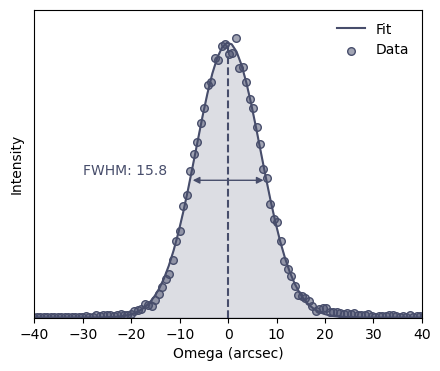

FHWM: 15.775584877832499, R2: 0.9985825814256793


In [1]:
from scipy.optimize import curve_fit
from scipy.special import wofz, gamma
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# figure save option
save_option = True
figsavepath = "../Figures/FigureS17_Si-XRC.svg"

### Representative Rocking Curves ###
path1 = '../Data/FigureS17_Si-XRC/Si-wafer_omega400_monochromator_NORM.csv'
df1 = pd.read_csv(path1)
x = df1['NORM_omega'].to_list()
y = df1['NORM'].to_list()
x = [n*3600 for n in x]
x = [n+1.5330195456580507 for n in x]

# define the PearsonVII function for the fitting of rocking curves
# https://www.originlab.com/doc/Origin-Help/PearsonVII-FitFunc
def PearsonVII(x, xc, y0, A, mu, w):
    y = y0 + A*(2*gamma(mu)*np.sqrt(2**(1/mu)-1))/np.sqrt(np.pi)/gamma(mu-0.5)/w*(1+4*(2**(1/mu)-1)/w/w*(x-xc)**2)**(-mu)
    return y

# initial guess for the parameters of the first peak
xc_guess = 0
y0_guess = 0
A_guess = 30
mu_guess = 1.0
w_guess = 30

# define the range of x-values to fit over
x_min = np.min(x)
x_max = np.max(x)

try:
    # fit the PearsonVII function to the data
    popt, pcov = curve_fit(PearsonVII, x, y, p0=[xc_guess, y0_guess, A_guess, mu_guess, w_guess])
    X = np.arange(x_min,x_max,1)

    # calculate R-squared value
    y_fit = PearsonVII(x, *popt)
    R2 = r2_score(y, y_fit)

    # Fitted Parameters
    y0_fit = popt[1]
    xc_fit = popt[0]
    A_fit = popt[2]
    w_fit = popt[4]
    mu_fit = popt[3]

    # Extract FWHM and FWXM (full-width at X% maximum)
    FWHM = w_fit

    # plot the fitted function and the data
    fig = plt.figure(figsize=(5,4))
    plt.plot(X, PearsonVII(X, *popt), color='#474D6B', label='Fit')
    plt.fill_between(X, PearsonVII(X, *popt), color='#474D6B30')
    plt.scatter(x, y, c='#474D6B80',ec='#474D6B', label='Data', s=30)
    plt.legend(frameon=False)
    plt.xlabel('Omega (arcsec)')
    plt.ylabel('Intensity')
    plt.yticks([])

    plt.xlim(-40,40)
    plt.ylim(0,1.1)
    
    height = max(PearsonVII(X,*popt))
    
    point = {
        'start': [-FWHM/2, height/2],
        'end': [FWHM/2, height/2]
    }
    
    plt.annotate('', xy=point['end'], xytext=point['start'],
                arrowprops=dict(arrowstyle='<|-|>',
                               connectionstyle='arc3', 
                            facecolor='#474D6B', 
                            edgecolor='#474D6B')
               )
    plt.vlines([0], 0, height, color='#474D6B', linestyles='dashed')
    plt.text(-30, 0.5, 'FWHM: 15.8', ha='left', va='bottom',color="#474D6B")
    
    if save_option:
        plt.savefig(figsavepath, dpi=1200, bbox_inches='tight')
    plt.show()

    print(f'FHWM: {FWHM}, R2: {R2}')

except:
    pass